In [1]:
import geopandas as gpd

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

algeria_fire = pd.read_csv(r"D:\S3\data_mining\viirs-jpss1_2024_Algeria.csv" , parse_dates=['acq_date'])

print(algeria_fire.shape)
print(algeria_fire.isnull().sum())

(87446, 15)
latitude      0
longitude     0
bright_ti4    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_ti5    0
frp           0
daynight      0
type          0
dtype: int64


In [3]:
from tabulate import tabulate
print(tabulate(algeria_fire.head(10), headers='keys', tablefmt='simple'))

      latitude    longitude    bright_ti4    scan    track  acq_date               acq_time  satellite    instrument    confidence      version    bright_ti5    frp  daynight      type
--  ----------  -----------  ------------  ------  -------  -------------------  ----------  -----------  ------------  ------------  ---------  ------------  -----  ----------  ------
 0     27.7282      9.872          295.51    0.76     0.77  2024-01-01 00:00:00           3  N20          VIIRS         n                     2        277.66   1.24  N                2
 1     28.6329      9.77909        301.8     0.79     0.78  2024-01-01 00:00:00           3  N20          VIIRS         n                     2        277.05   1.57  N                2
 2     28.6401      9.77953        298.65    0.79     0.78  2024-01-01 00:00:00           3  N20          VIIRS         n                     2        277.04   1.34  N                2
 3     36.7489      6.25409        338.04    0.46     0.39  2024-01-01 00:0

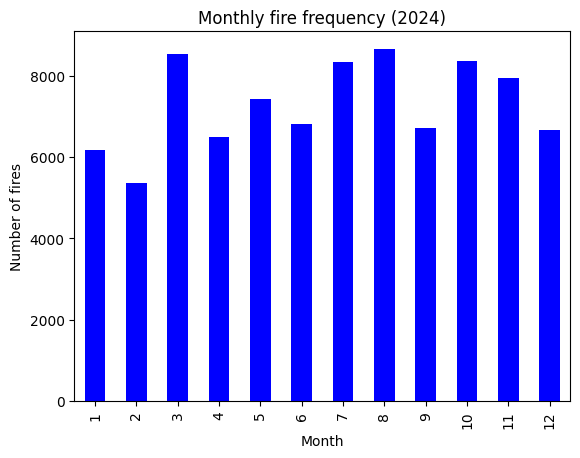

In [4]:
fires = pd.DataFrame()
algeria_fire['acq_date'] = pd.to_datetime(algeria_fire['acq_date'], errors='coerce')

fires['month'] = algeria_fire['acq_date'].dt.month
fires['day'] = algeria_fire['acq_date'].dt.day
fires['year'] = algeria_fire['acq_date'].dt.year

fires_per_month = fires.groupby('month').size()
fires_per_month.plot(kind='bar', color='blue')
plt.title("Monthly fire frequency (2024)")
plt.xlabel("Month")
plt.ylabel("Number of fires")
plt.show()


In [5]:
algeria_fire['daynight'] = np.where(algeria_fire['daynight'] == 'N' ,0,1)
algeria_fire['confidence'] = algeria_fire['confidence'].map({'l': 0, 'n': 1, 'h': 2})

algeria_fire = algeria_fire.drop(columns=[ 'instrument' , 'satellite' , 'version'] , axis=1)

from tabulate import tabulate
print(tabulate(algeria_fire.head(10), headers='keys', tablefmt='simple'))


      latitude    longitude    bright_ti4    scan    track  acq_date               acq_time    confidence    bright_ti5    frp    daynight    type
--  ----------  -----------  ------------  ------  -------  -------------------  ----------  ------------  ------------  -----  ----------  ------
 0     27.7282      9.872          295.51    0.76     0.77  2024-01-01 00:00:00           3             1        277.66   1.24           0       2
 1     28.6329      9.77909        301.8     0.79     0.78  2024-01-01 00:00:00           3             1        277.05   1.57           0       2
 2     28.6401      9.77953        298.65    0.79     0.78  2024-01-01 00:00:00           3             1        277.04   1.34           0       2
 3     36.7489      6.25409        338.04    0.46     0.39  2024-01-01 00:00:00         141             1        257.28   5.21           0       2
 4     35.8798      4.44782        309.49    0.41     0.37  2024-01-01 00:00:00         141             1        272.0

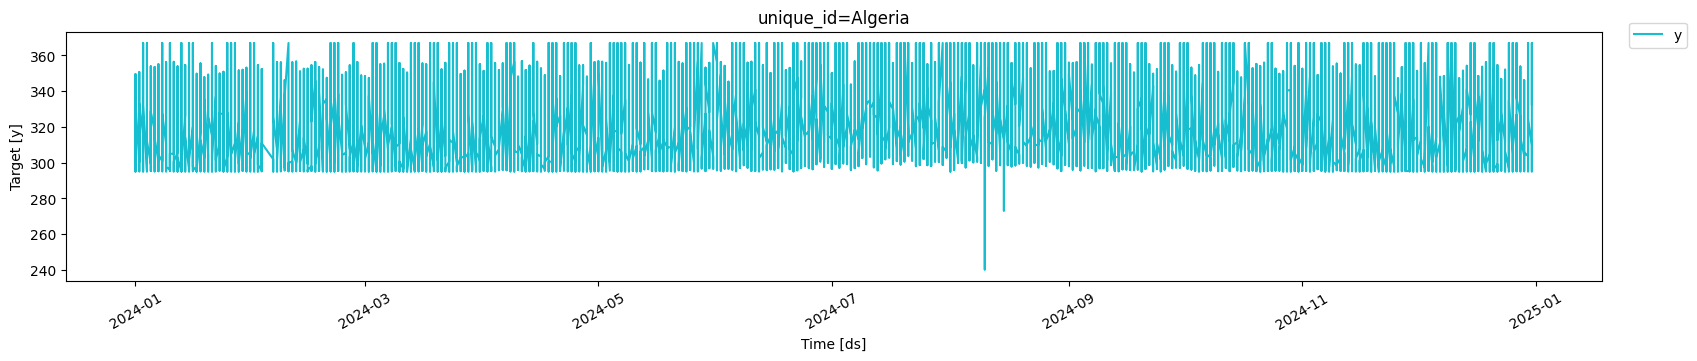

In [6]:
from utilsforecast.plotting import plot_series
df_plot = pd.DataFrame({
    'unique_id': 'Algeria',           # label for your series
    'ds': algeria_fire['acq_date'],   # date/time
    'y': algeria_fire['bright_ti4']   # value to plot
})
plot_series(df=df_plot, ids=['Algeria'])



In [7]:
algeria_fire = algeria_fire.drop(columns=['acq_date'] , axis=1)
cor = algeria_fire.corr()
print(cor)

            latitude  longitude  bright_ti4      scan     track  acq_time  \
latitude    1.000000  -0.599829   -0.140530 -0.050927 -0.072580 -0.029918   
longitude  -0.599829   1.000000    0.149426  0.034283  0.060584  0.036621   
bright_ti4 -0.140530   0.149426    1.000000 -0.047491  0.002141  0.685039   
scan       -0.050927   0.034283   -0.047491  1.000000  0.576612 -0.005257   
track      -0.072580   0.060584    0.002141  0.576612  1.000000  0.004065   
acq_time   -0.029918   0.036621    0.685039 -0.005257  0.004065  1.000000   
confidence  0.056666  -0.040093   -0.161434  0.019301  0.074317 -0.376643   
bright_ti5 -0.095775   0.070197    0.666969 -0.059179 -0.078359  0.733894   
frp         0.025805   0.034590    0.457272  0.104650  0.051175  0.316909   
daynight   -0.054915   0.074550    0.698458 -0.007630  0.003865  0.990652   
type        0.010638   0.017763   -0.115636 -0.034546 -0.024882 -0.152887   

            confidence  bright_ti5       frp  daynight      type  
latitude

<Axes: >

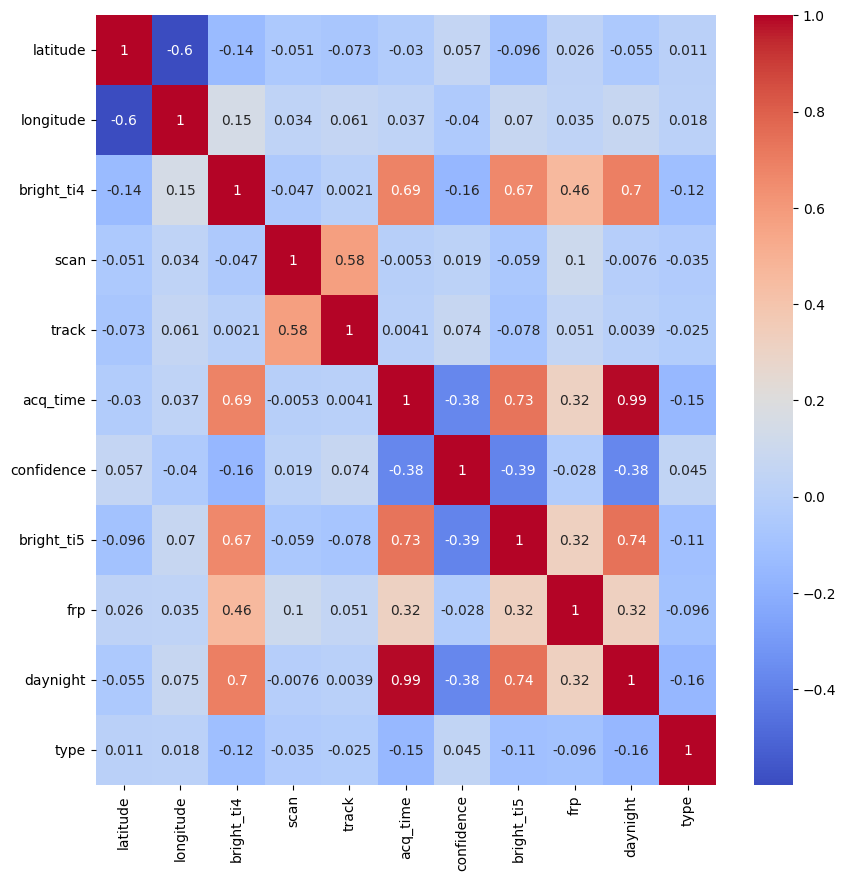

In [8]:
import seaborn as sn

plt.figure(figsize=(10, 10))
sn.heatmap(cor, annot=True, cmap='coolwarm')

#plt.imshow(cor, cmap='coolwarm', interpolation='nearest')
#plt.colorbar(label='Correlation coefficient')

In [9]:
fire_algeria_to_shp = gpd.GeoDataFrame(algeria_fire , crs="EPSG:4326" , geometry=gpd.points_from_xy(algeria_fire["longitude"] , algeria_fire["latitude"]))

In [10]:
print(tabulate(fire_algeria_to_shp.head(10), headers='keys', tablefmt='simple'))

      latitude    longitude    bright_ti4    scan    track    acq_time    confidence    bright_ti5    frp    daynight    type  geometry
--  ----------  -----------  ------------  ------  -------  ----------  ------------  ------------  -----  ----------  ------  ------------------------
 0     27.7282      9.872          295.51    0.76     0.77           3             1        277.66   1.24           0       2  POINT (9.872 27.72818)
 1     28.6329      9.77909        301.8     0.79     0.78           3             1        277.05   1.57           0       2  POINT (9.77909 28.63288)
 2     28.6401      9.77953        298.65    0.79     0.78           3             1        277.04   1.34           0       2  POINT (9.77953 28.64012)
 3     36.7489      6.25409        338.04    0.46     0.39         141             1        257.28   5.21           0       2  POINT (6.25409 36.74886)
 4     35.8798      4.44782        309.49    0.41     0.37         141             1        272.08   1.58 

In [11]:
fire_algeria_to_shp.to_file(r"D:\S3\data_mining\projet\algeria_fire_shape\algeria_fire_shape.shp")

<Axes: >

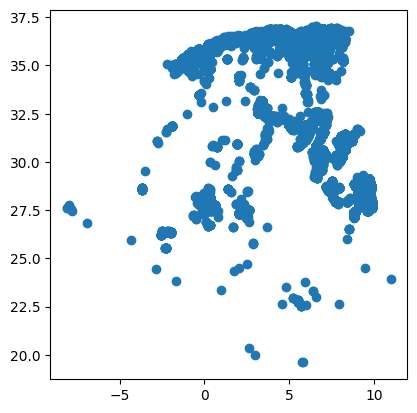

In [12]:
algeria_fire_shape = gpd.read_file(r"D:\S3\data_mining\projet\algeria_fire_shape\algeria_fire_shape.shp")
algeria_fire_shape.plot()

In [13]:
tunis_fire = pd.read_csv(r"D:\S3\data_mining\viirs-jpss1_2024_Tunisia.csv")
print(tabulate(tunis_fire.head(10), headers='keys', tablefmt='simple'))

      latitude    longitude    bright_ti4    scan    track  acq_date      acq_time  satellite    instrument    confidence      version    bright_ti5    frp  daynight      type
--  ----------  -----------  ------------  ------  -------  ----------  ----------  -----------  ------------  ------------  ---------  ------------  -----  ----------  ------
 0     31.6485      9.16945        315.79    0.53     0.5   2024-01-01         142  N20          VIIRS         n                     2        279.09   2.2   N                2
 1     31.4929      9.48947        302.32    0.56     0.51  2024-01-01         142  N20          VIIRS         n                     2        276.1    1.23  N                0
 2     31.4952      9.49053        301.88    0.56     0.51  2024-01-01         142  N20          VIIRS         n                     2        276.12   0.77  N                0
 3     33.3673      8.54768        302.58    0.45     0.47  2024-01-01         142  N20          VIIRS         n        

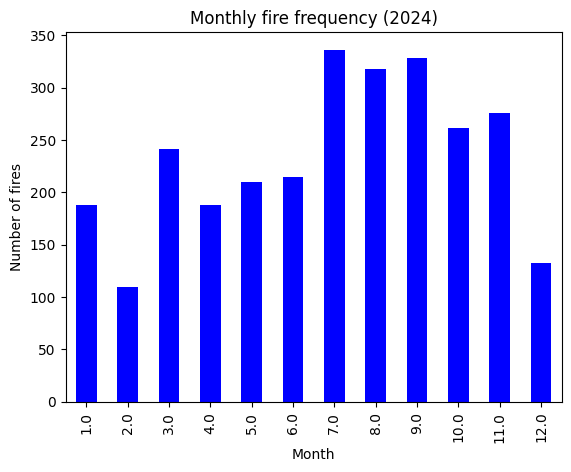

In [14]:
tunis_fire['acq_date'] = pd.to_datetime(tunis_fire['acq_date'], errors='coerce')

fires['month'] = tunis_fire['acq_date'].dt.month
fires['day'] = tunis_fire['acq_date'].dt.day
fires['year'] = tunis_fire['acq_date'].dt.year

fires_per_month = fires.groupby('month').size()
fires_per_month.plot(kind='bar', color='blue')
plt.title("Monthly fire frequency (2024)")
plt.xlabel("Month")
plt.ylabel("Number of fires")
plt.show()

In [15]:
tunis_fire['daynight'] = np.where(tunis_fire['daynight'] == 'N' ,0,1)
tunis_fire['confidence'] = tunis_fire['confidence'].map({'l': 0, 'n': 1, 'h': 2})

tunis_fire = tunis_fire.drop(columns=[ 'instrument' , 'satellite' , 'version'] , axis=1)

from tabulate import tabulate
print(tabulate(tunis_fire.head(10), headers='keys', tablefmt='simple'))


      latitude    longitude    bright_ti4    scan    track  acq_date               acq_time    confidence    bright_ti5    frp    daynight    type
--  ----------  -----------  ------------  ------  -------  -------------------  ----------  ------------  ------------  -----  ----------  ------
 0     31.6485      9.16945        315.79    0.53     0.5   2024-01-01 00:00:00         142             1        279.09   2.2            0       2
 1     31.4929      9.48947        302.32    0.56     0.51  2024-01-01 00:00:00         142             1        276.1    1.23           0       0
 2     31.4952      9.49053        301.88    0.56     0.51  2024-01-01 00:00:00         142             1        276.12   0.77           0       0
 3     33.3673      8.54768        302.58    0.45     0.47  2024-01-01 00:00:00         142             1        277.15   0.8            0       2
 4     31.6481      9.17107        320.8     0.46     0.39  2024-01-02 00:00:00         124             1        278.3

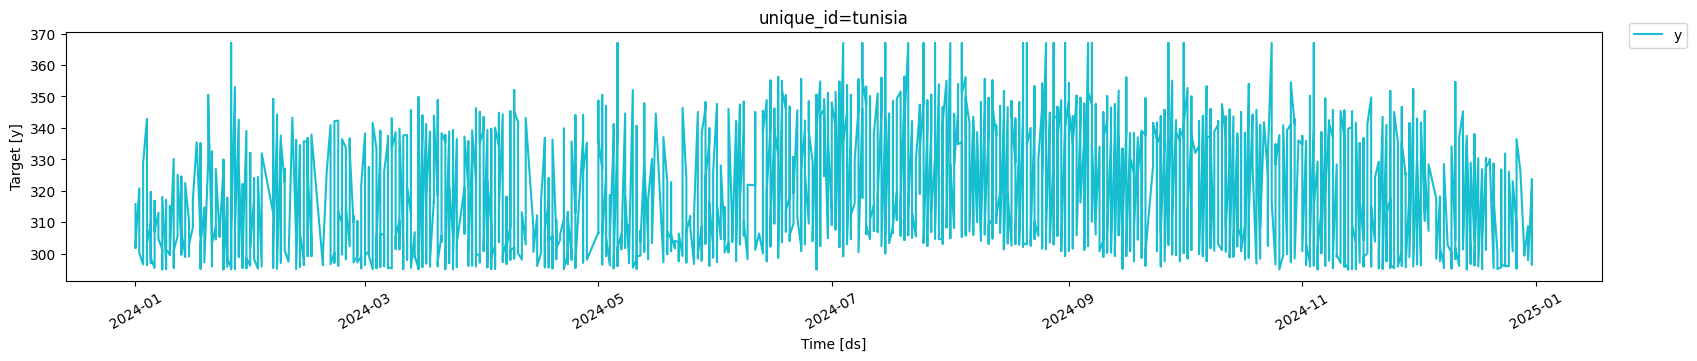

In [16]:
df_plot = pd.DataFrame({
    'unique_id': 'tunisia',           # label for your series
    'ds': tunis_fire['acq_date'],   # date/time
    'y': tunis_fire['bright_ti4']   # value to plot
})
plot_series(df=df_plot, ids=['tunisia'])

            latitude  longitude  bright_ti4      scan     track  acq_date  \
latitude    1.000000   0.403898   -0.146747 -0.162922 -0.187160  0.070962   
longitude   0.403898   1.000000   -0.275093 -0.163089 -0.107980  0.007651   
bright_ti4 -0.146747  -0.275093    1.000000  0.023099  0.034675  0.147474   
scan       -0.162922  -0.163089    0.023099  1.000000  0.519392 -0.003861   
track      -0.187160  -0.107980    0.034675  0.519392  1.000000  0.029510   
acq_date    0.070962   0.007651    0.147474 -0.003861  0.029510  1.000000   
acq_time    0.096507  -0.129101    0.791036  0.026015  0.002718  0.077235   
confidence -0.043732   0.049497   -0.180062  0.012269  0.103611 -0.002711   
bright_ti5  0.058280  -0.053202    0.742831 -0.043528 -0.087277  0.165937   
frp         0.089739  -0.083772    0.320650  0.077627 -0.013421  0.086853   
daynight    0.099328  -0.120858    0.793774  0.024928 -0.000874  0.079270   
type       -0.384645  -0.201347   -0.175264  0.000412  0.035586 -0.036283   

<Axes: >

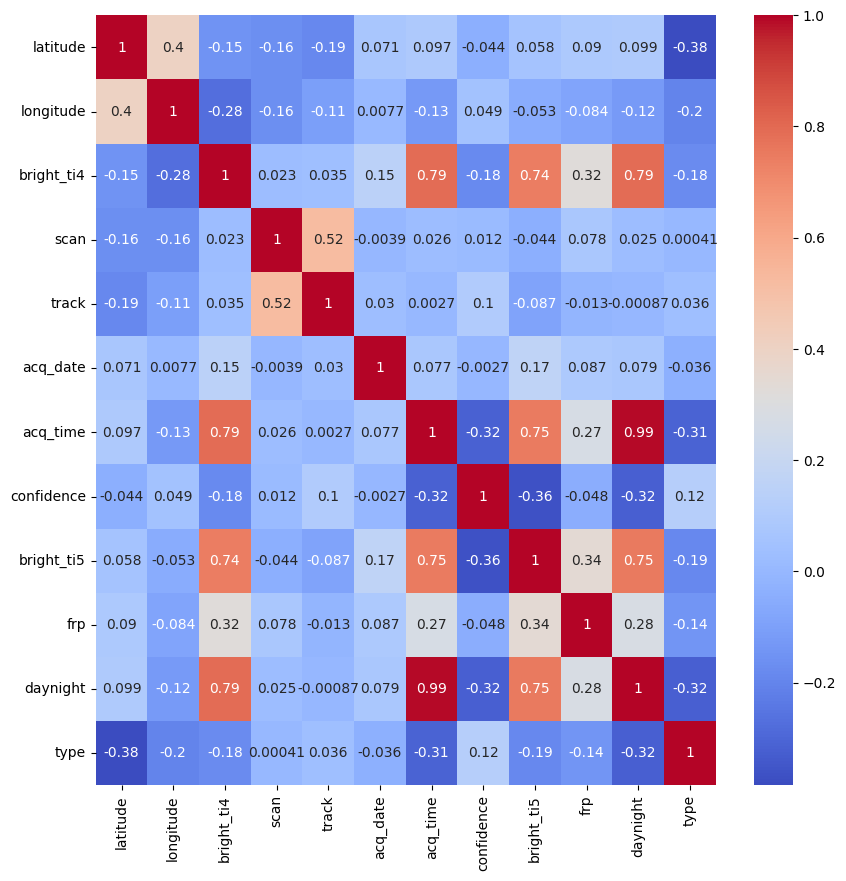

In [17]:
#tunis_fire = tunis_fire.drop(columns=['acq_date'] , axis=1)
cor = tunis_fire.corr()
print(cor)

plt.figure(figsize=(10, 10))
sn.heatmap(cor, annot=True, cmap='coolwarm')

In [18]:
fire_tunis_to_shp = gpd.GeoDataFrame(tunis_fire , crs="EPSG:4326" , geometry=gpd.points_from_xy(tunis_fire["longitude"] , tunis_fire["latitude"]))
print(tabulate(fire_tunis_to_shp.head(10), headers='keys', tablefmt='simple'))
fire_tunis_to_shp.to_file(r"D:\S3\data_mining\projet\tunisia_fire_shape\tunisia_fire_shape.shp")

      latitude    longitude    bright_ti4    scan    track  acq_date               acq_time    confidence    bright_ti5    frp    daynight    type  geometry
--  ----------  -----------  ------------  ------  -------  -------------------  ----------  ------------  ------------  -----  ----------  ------  -------------------------
 0     31.6485      9.16945        315.79    0.53     0.5   2024-01-01 00:00:00         142             1        279.09   2.2            0       2  POINT (9.16945 31.64847)
 1     31.4929      9.48947        302.32    0.56     0.51  2024-01-01 00:00:00         142             1        276.1    1.23           0       0  POINT (9.48947 31.4929)
 2     31.4952      9.49053        301.88    0.56     0.51  2024-01-01 00:00:00         142             1        276.12   0.77           0       0  POINT (9.49053 31.49524)
 3     33.3673      8.54768        302.58    0.45     0.47  2024-01-01 00:00:00         142             1        277.15   0.8            0       2  POI

c:\Users\serra\AppData\Local\Programs\Python\Python313\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Field acq_date create as date field, though DateTime requested.
  ogr_write(


<Axes: >

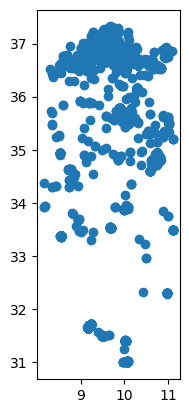

In [19]:
tunisia_fire_shape = gpd.read_file(r"D:\S3\data_mining\projet\tunisia_fire_shape\tunisia_fire_shape\tunisia_fire_shape.shp")
tunisia_fire_shape.plot()

In [20]:
algeria_shape = gpd.read_file(r"D:\S3\data_mining\geonetwork_algeria\dza_gc_adg.shp")
tunis_shape = gpd.read_file(r"D:\S3\data_mining\geonetwrok_tunisia\tun_gc_adg.shp")

EPSG:4326


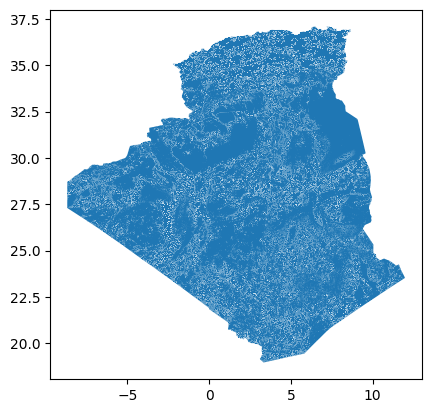

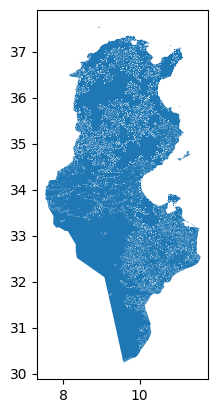

In [21]:
import matplotlib.pyplot as plt
algeria_shape.plot()
tunis_shape.plot()
print(algeria_shape.crs)

In [22]:
algeria_shape_gdf = gpd.read_file(r"D:\S3\data_mining\geonetwork_algeria\dza_gc_adg.shp")

print(tabulate(algeria_shape_gdf.head(10), headers='keys', tablefmt='simple'))


      ID    GRIDCODE              AREA  LCCCODE       geometry
--  ----  ----------  ----------------  ------------  -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

C:\Users\serra\AppData\Local\Temp\ipykernel_23488\263254563.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x='GRIDCODE', y='count', data=class_counts, palette='viridis' )


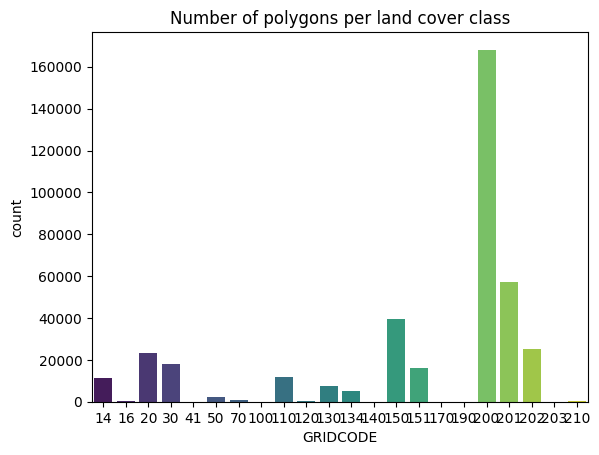

In [23]:

class_counts = algeria_shape['GRIDCODE'].value_counts().reset_index()
class_counts.columns = ['GRIDCODE', 'count']

sn.barplot(x='GRIDCODE', y='count', data=class_counts, palette='viridis' )
plt.title('Number of polygons per land cover class')
plt.show()

C:\Users\serra\AppData\Local\Temp\ipykernel_23488\2420142717.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.boxplot(


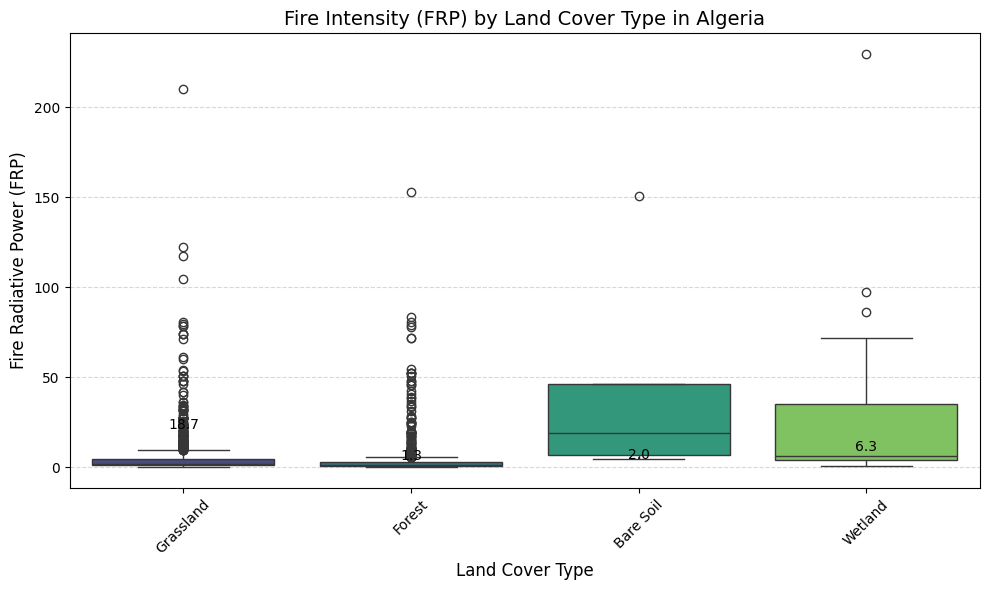

In [24]:
fire_algeria_to_shp = gpd.GeoDataFrame(
    algeria_fire,  # your fire DataFrame
    geometry=gpd.points_from_xy(algeria_fire["longitude"], algeria_fire["latitude"]),
    crs="EPSG:4326"
)

# 2️⃣ Load the land cover shapefile (vector version)
algeria_landcover = gpd.read_file(r"D:\S3\data_mining\geonetwork_algeria\dza_gc_adg.shp")


fire_algeria_to_shp = fire_algeria_to_shp.to_crs(algeria_landcover.crs)

# 4️⃣ Spatial join: assign each fire to a land cover polygon
fires_with_lc = gpd.sjoin(
    fire_algeria_to_shp,
    algeria_landcover[['GRIDCODE', 'geometry']],
    how='inner',
    predicate='within'
)

# 5️⃣ Optional: map GRIDCODE to readable class names (based on FAO/Corine definitions)
landcover_map = {
    10: 'Cropland',
    20: 'Forest',
    30: 'Grassland',
    40: 'Shrubland',
    50: 'Wetland',
    60: 'Urban',
    70: 'Bare Soil',
    80: 'Water',
    90: 'Snow/Ice'
}
fires_with_lc['LandCoverName'] = fires_with_lc['GRIDCODE'].map(landcover_map)

# Drop NaNs if any unmapped classes exist
fires_with_lc = fires_with_lc.dropna(subset=['frp', 'LandCoverName'])

# ============================================================
#  🔥 BOX PLOT: FRP DISTRIBUTION BY LAND COVER TYPE
# ============================================================

plt.figure(figsize=(10,6))
sn.boxplot(
    x='LandCoverName',
    y='frp',
    data=fires_with_lc,
    palette='viridis'
)
plt.title("Fire Intensity (FRP) by Land Cover Type in Algeria", fontsize=14)
plt.xlabel("Land Cover Type", fontsize=12)
plt.ylabel("Fire Radiative Power (FRP)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

# Annotate median values on top of each box
medians = fires_with_lc.groupby('LandCoverName')['frp'].median().sort_index()
for xtick, label in enumerate(sorted(fires_with_lc['LandCoverName'].unique())):
    plt.text(
        xtick,
        medians[label] + 1,  # position slightly above median line
        f'{medians[label]:.1f}',
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.tight_layout()
plt.show()

C:\Users\serra\AppData\Local\Temp\ipykernel_23488\258343368.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.boxplot(


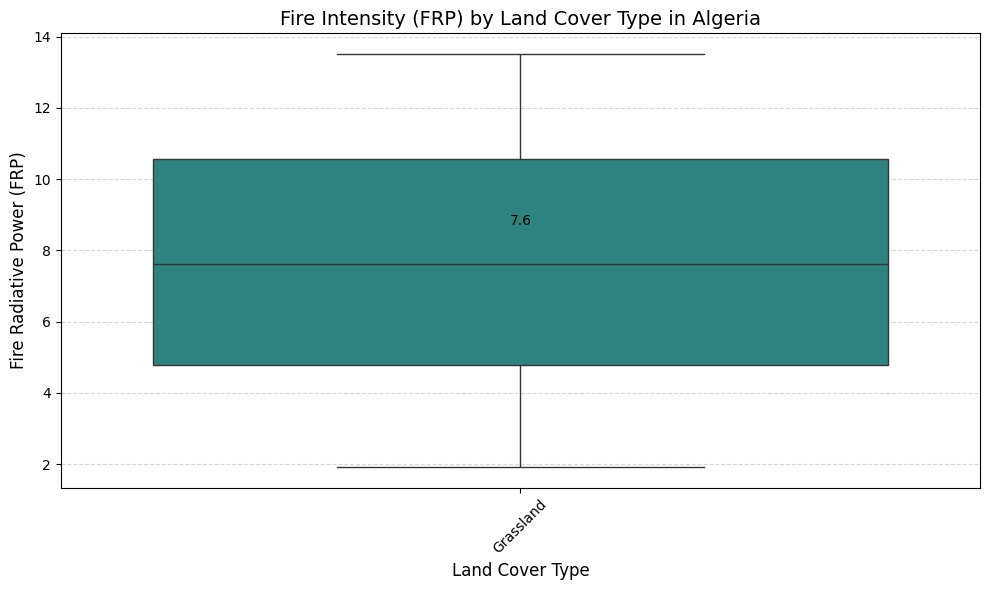

In [25]:
fire_tunisia_to_shp = gpd.GeoDataFrame(
    tunis_fire,  # your fire DataFrame
    geometry=gpd.points_from_xy(tunis_fire["longitude"], tunis_fire["latitude"]),
    crs="EPSG:4326"
)

# 2️⃣ Load the land cover shapefile (vector version)
tunisia_landcover = gpd.read_file(r"D:\S3\data_mining\geonetwrok_tunisia\tun_gc_adg.shp")


fire_tunisia_to_shp = fire_tunisia_to_shp.to_crs(tunisia_landcover.crs)

# 4️⃣ Spatial join: assign each fire to a land cover polygon
fires_with_lc = gpd.sjoin(
    fire_tunisia_to_shp,
    algeria_landcover[['GRIDCODE', 'geometry']],
    how='inner',
    predicate='within'
)

# 5️⃣ Optional: map GRIDCODE to readable class names (based on FAO/Corine definitions)
landcover_map = {
    10: 'Cropland',
    20: 'Forest',
    30: 'Grassland',
    40: 'Shrubland',
    50: 'Wetland',
    60: 'Urban',
    70: 'Bare Soil',
    80: 'Water',
    90: 'Snow/Ice'
}
fires_with_lc['LandCoverName'] = fires_with_lc['GRIDCODE'].map(landcover_map)

# Drop NaNs if any unmapped classes exist
fires_with_lc = fires_with_lc.dropna(subset=['frp', 'LandCoverName'])

# ============================================================
#  🔥 BOX PLOT: FRP DISTRIBUTION BY LAND COVER TYPE
# ============================================================

plt.figure(figsize=(10,6))
sn.boxplot(
    x='LandCoverName',
    y='frp',
    data=fires_with_lc,
    palette='viridis'
)
plt.title("Fire Intensity (FRP) by Land Cover Type in Algeria", fontsize=14)
plt.xlabel("Land Cover Type", fontsize=12)
plt.ylabel("Fire Radiative Power (FRP)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

# Annotate median values on top of each box
medians = fires_with_lc.groupby('LandCoverName')['frp'].median().sort_index()
for xtick, label in enumerate(sorted(fires_with_lc['LandCoverName'].unique())):
    plt.text(
        xtick,
        medians[label] + 1,  # position slightly above median line
        f'{medians[label]:.1f}',
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.tight_layout()
plt.show()

<Axes: >

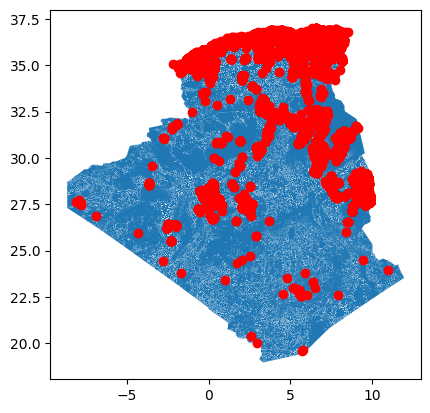

In [23]:
fig , ax = plt.subplots(1)
algeria_shape.plot(ax = ax)
algeria_fire_shape.plot(ax = ax , facecolor="red")

<Axes: >

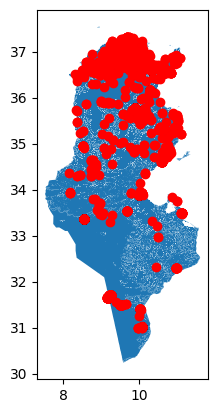

In [24]:
fig , ax = plt.subplots(1)
tunis_shape.plot(ax = ax)
tunisia_fire_shape.plot(ax = ax , facecolor="red")

trying to clip 

In [25]:
import rioxarray as rx
import rasterio
from rasterio.plot import show

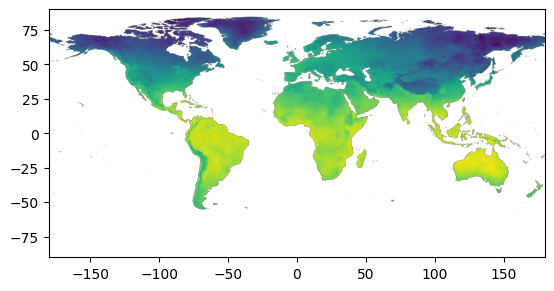

<Axes: >

In [31]:
world = rasterio.open(r"D:\S3\data_mining\2020_5min_min\wc2.1_cruts4.09_5m_tmin_2020-01.tif")
show(world)

union algeria & tunisia

c:\Users\serra\AppData\Local\Programs\Python\Python313\Lib\site-packages\geopandas\tools\overlay.py:358: UserWarning: `keep_geom_type=True` in overlay resulted in 14 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  result = _collection_extract(result, geom_type, keep_geom_type_warning)


<Axes: >

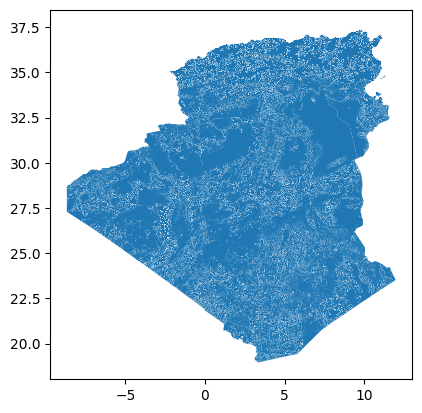

In [17]:
alg_tun = gpd.overlay(algeria_shape , tunis_shape , how="union")
alg_tun.plot()

<Axes: >

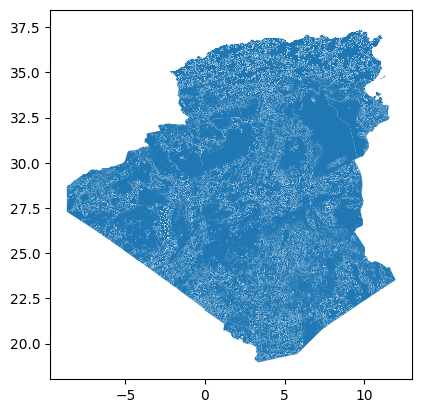

In [26]:
alg_tun2 = gpd.pd.concat([algeria_shape, tunis_shape], ignore_index=True)
alg_tun2.plot()

In [ ]:
world_rx = rx.open_rasterio(r"D:\S3\data_mining\2020_5min_min\wc2.1_cruts4.09_5m_tmin_2024-08.tif")
clipped = world_rx.rio.clip(alg_tun2.geometry , alg_tun2.crs)
clipped.rio.to_raster("result1.tif")

KeyboardInterrupt: 

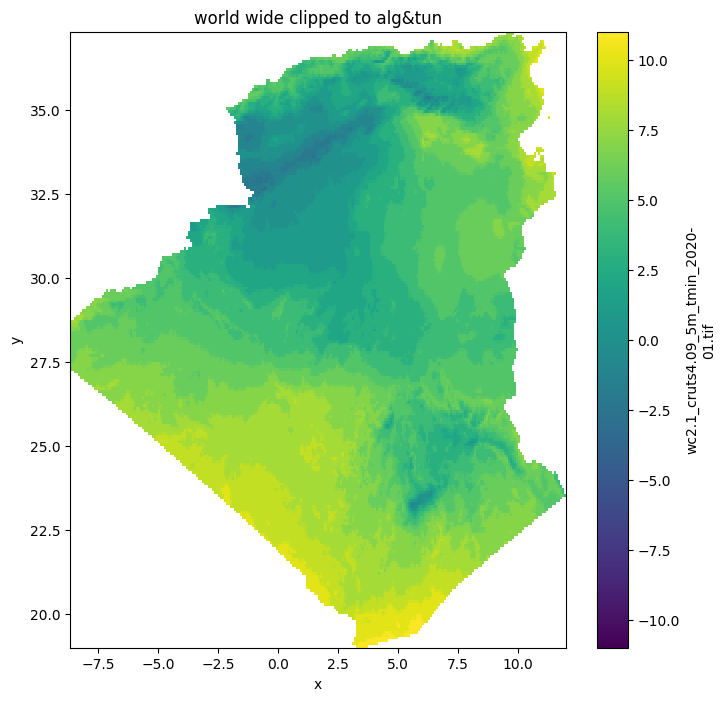

Min temperature: -3.25°C
Max temperature: 11.00°C
Mean temperature: 4.97°C
Standard deviation: 2.64°C


In [33]:
clipped = rx.open_rasterio(r"D:\S3\data_mining\projet\result1.tif")

fig, ax = plt.subplots(figsize=(8, 8))
im = clipped.plot(ax=ax, cmap='viridis', add_colorbar=True)
ax.set_title('world wide clipped to alg&tun')
plt.show()

print(f"Min temperature: {float(clipped.min()):.2f}°C")
print(f"Max temperature: {float(clipped.max()):.2f}°C")
print(f"Mean temperature: {float(clipped.mean()):.2f}°C")
print(f"Standard deviation: {float(clipped.std()):.2f}°C")

In [37]:
import rasterio
from rasterio import features
import geopandas as gpd


import rasterio
from rasterio import features
import geopandas as gpd
from shapely.geometry import shape
from tabulate import tabulate

with rasterio.open(r"D:\S3\data_mining\projet\worldwide_clipping_result\wc2.1_cruts4.09_5m_tmin_2020-02.tif") as src:
    image_data = src.read(1)
    
    # Convert raster to vector
    shapes = list(features.shapes(image_data, transform=src.transform))
    
    # Create geometries and properties
    geometries = []
    values = []
    
    for geom, value in shapes:
        geometries.append(shape(geom))
        values.append(value)
    
    # Create GeoDataFrame WITH geometry
    climate_gdf = gpd.GeoDataFrame({
        'tmin_value': values,
        'geometry': geometries
    }, crs=src.crs)

print(tabulate(climate_gdf.head(10), headers='keys', tablefmt='simple'))
print(f"CRS: {climate_gdf.crs}")
print(f"Number of polygons: {len(climate_gdf)}")


      tmin_value  geometry
--  ------------  ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 0          7.5   POLYGON ((9.49999999999998 37.33333333333333, 9.49999999999998 37.24999999999999, 9.583333333333313 37.24999999999999, 9.583333333333313 37.166666666666664, 9.666666666666648 37.166666666666664, 9.666666666666648 37.33333333333333, 9.49999999999998 37.33333333333333))
 1          8.5   POLYGON ((9.166666666666648 37.24999999999999, 9.166666666666648 37.166666666666664, 9.24999999999998 37.166666666666664, 9.24999999999998 37.24999999999999, 9.166666666666648 37.24999999999999))
 2          8     POLYGON ((9.24999999999998 37.24999999999999, 9.24999999999998 37.166666666666664, 9.416666666666648 37.166666666666664, 9.416666666666648 37.24999999999999, 9.2499999

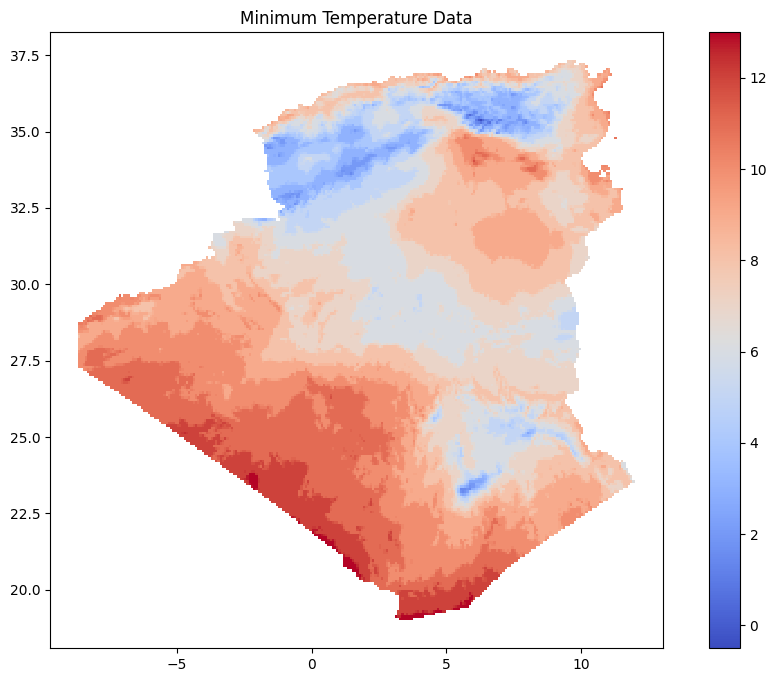

Temperature range: -0.5 to 13.0


In [38]:
# Quick plot
climate_gdf.plot(column='tmin_value', cmap='coolwarm', figsize=(12, 8), legend=True)
plt.title("Minimum Temperature Data")
plt.show()

# Basic stats
print(f"Temperature range: {climate_gdf['tmin_value'].min()} to {climate_gdf['tmin_value'].max()}")

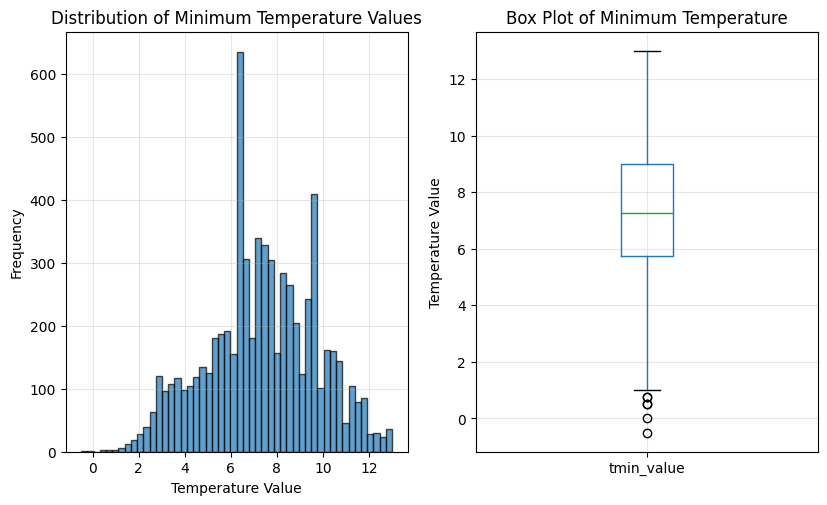

In [39]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 3, 1)
climate_gdf['tmin_value'].hist(bins=50, alpha=0.7, edgecolor='black')
plt.title('Distribution of Minimum Temperature Values')
plt.xlabel('Temperature Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# 3. BOX PLOT
plt.subplot(2, 3, 2)
climate_gdf.boxplot(column='tmin_value')
plt.title('Box Plot of Minimum Temperature')
plt.ylabel('Temperature Value')
plt.grid(True, alpha=0.3)


C:\Users\serra\AppData\Local\Temp\ipykernel_23488\3624490900.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  climate_gdf['centroid'] = climate_gdf.geometry.centroid
C:\Users\serra\AppData\Local\Temp\ipykernel_23488\3624490900.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  climate_gdf['latitude'] = climate_gdf.centroid.y


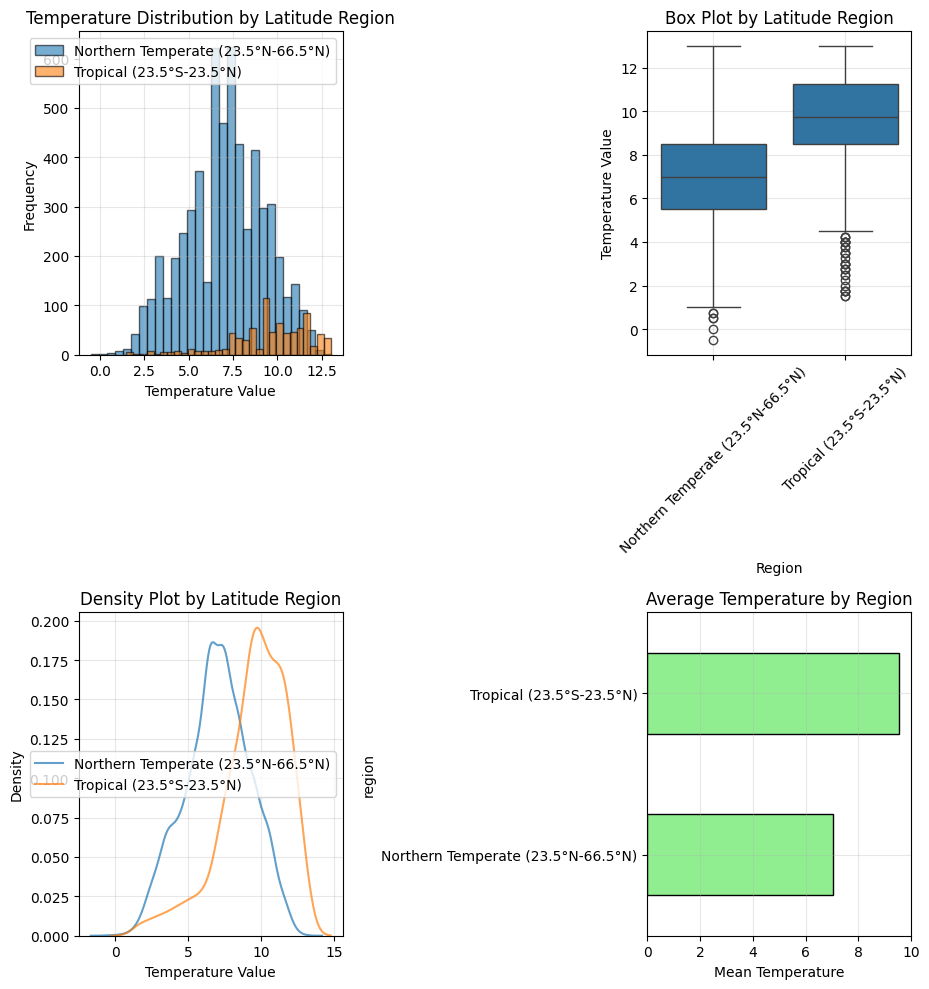

=== REGIONAL STATISTICS ===
                                     count      mean       std  min  25%  \
region                                                                     
Northern Temperate (23.5°N-66.5°N)  5869.0  7.020418  2.221427 -0.5  5.5   
Tropical (23.5°S-23.5°N)             814.0  9.531634  2.256635  1.5  8.5   

                                     50%    75%   max  
region                                                 
Northern Temperate (23.5°N-66.5°N)  7.00   8.50  13.0  
Tropical (23.5°S-23.5°N)            9.75  11.25  13.0  


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Create simple latitude-based regions
climate_gdf['centroid'] = climate_gdf.geometry.centroid
climate_gdf['latitude'] = climate_gdf.centroid.y

# Create regions based on latitude
climate_gdf['region'] = 'Tropical (23.5°S-23.5°N)'
climate_gdf.loc[climate_gdf['latitude'] > 23.5, 'region'] = 'Northern Temperate (23.5°N-66.5°N)'
climate_gdf.loc[climate_gdf['latitude'] < -23.5, 'region'] = 'Southern Temperate (23.5°S-66.5°S)'
climate_gdf.loc[climate_gdf['latitude'] > 66.5, 'region'] = 'Arctic (>66.5°N)'
climate_gdf.loc[climate_gdf['latitude'] < -66.5, 'region'] = 'Antarctic (>66.5°S)'

# Create subplots
plt.figure(figsize=(15, 10))

# 1. HISTOGRAM BY REGION
plt.subplot(2, 3, 1)
for region in climate_gdf['region'].unique():
    data = climate_gdf[climate_gdf['region'] == region]['tmin_value']
    plt.hist(data, bins=30, alpha=0.6, label=region, edgecolor='black')
plt.title('Temperature Distribution by Latitude Region')
plt.xlabel('Temperature Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. BOX PLOT BY REGION
plt.subplot(2, 3, 2)
sns.boxplot(data=climate_gdf, x='region', y='tmin_value')
plt.title('Box Plot by Latitude Region')
plt.xlabel('Region')
plt.ylabel('Temperature Value')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# 3. VIOLIN PLOT BY REGION
"""plt.subplot(2, 3, 3)
sns.violinplot(data=climate_gdf, x='region', y='tmin_value')
plt.title('Violin Plot by Latitude Region')
plt.xlabel('Region')
plt.ylabel('Temperature Value')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)"""

# 4. DENSITY PLOT BY REGION
"""plt.subplot(2, 3, 4)
for region in climate_gdf['region'].unique():
    data = climate_gdf[climate_gdf['region'] == region]['tmin_value']
    sns.kdeplot(data, label=region, alpha=0.7)
plt.title('Density Plot by Latitude Region')
plt.xlabel('Temperature Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)"""

# 5. BAR PLOT OF MEAN TEMPERATURES
plt.subplot(2, 3, 5)
mean_temps = climate_gdf.groupby('region')['tmin_value'].mean().sort_values()
mean_temps.plot(kind='barh', color='lightgreen', edgecolor='black')
plt.title('Average Temperature by Region')
plt.xlabel('Mean Temperature')
plt.grid(True, alpha=0.3)

# 6. SCATTER PLOT: Temperature vs Latitude
"""plt.subplot(2, 3, 6)
plt.scatter(climate_gdf['latitude'], climate_gdf['tmin_value'], alpha=0.5, s=1)
plt.title('Temperature vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature Value')
plt.grid(True, alpha=0.3)"""

plt.tight_layout()
plt.show()

# Print regional statistics
print("=== REGIONAL STATISTICS ===")
print(climate_gdf.groupby('region')['tmin_value'].describe())

C:\Users\serra\AppData\Local\Temp\ipykernel_23488\125265452.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  climate_gdf.loc[climate_gdf.geometry.centroid.y > 34.5, 'coastal_inland'] = 'Coastal'  # Northern areas
C:\Users\serra\AppData\Local\Temp\ipykernel_23488\125265452.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  climate_gdf.loc[climate_gdf.geometry.centroid.x > 8.5, 'coastal_inland'] = 'Coastal'   # Eastern coastal areas
C:\Users\serra\AppData\Local\Temp\ipykernel_23488\125265452.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  climate_gdf.loc[climate

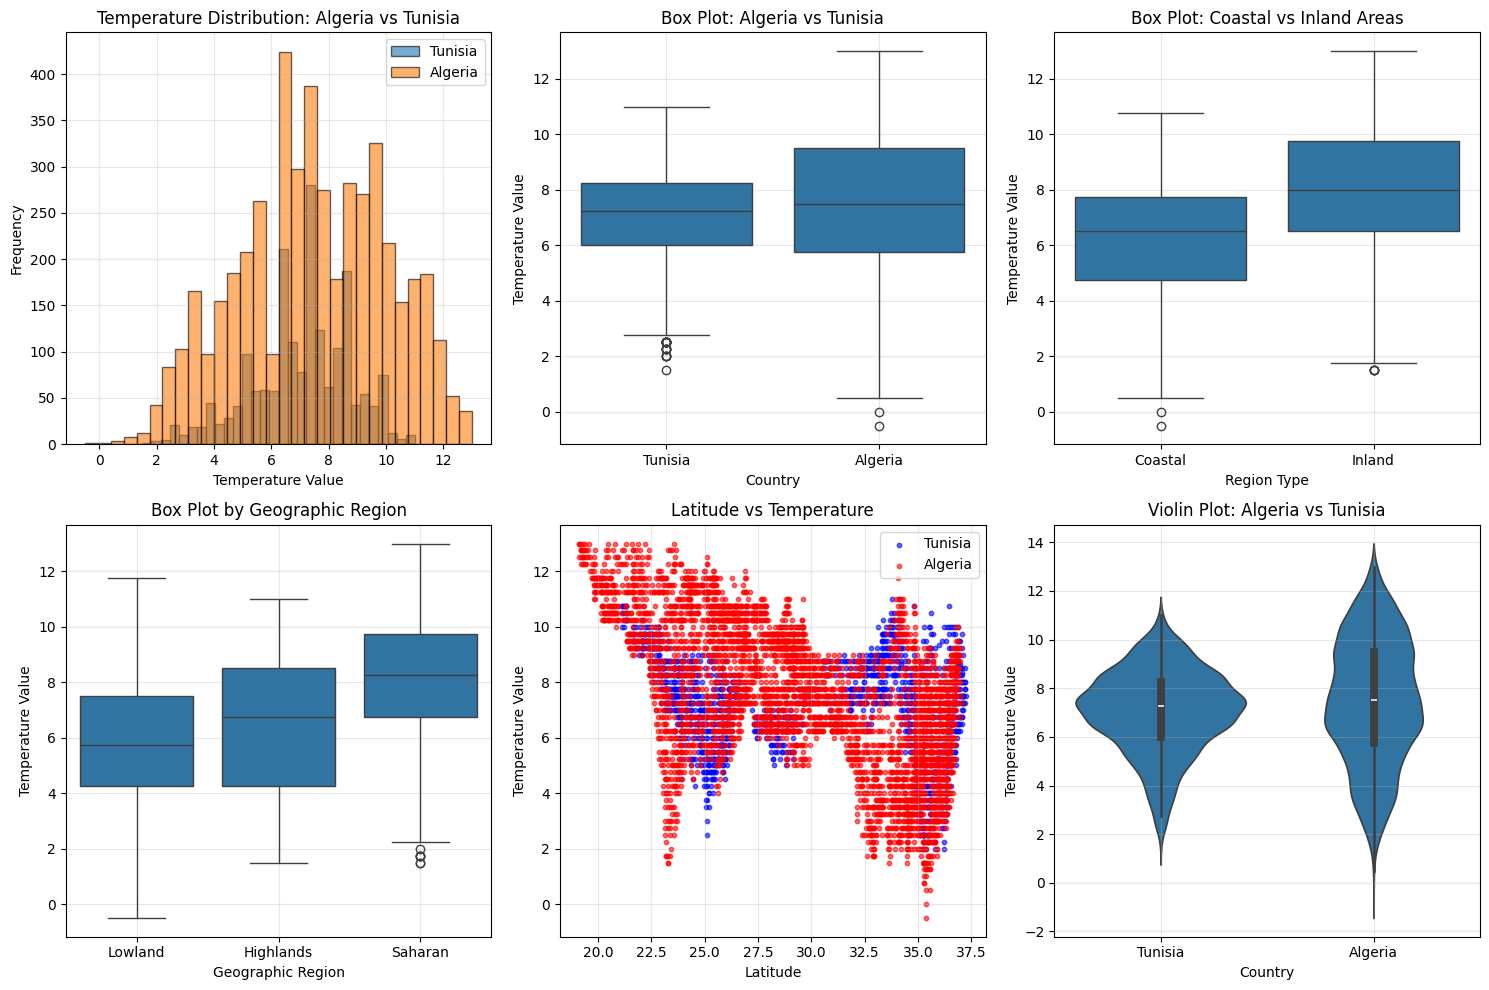

=== ALGERIA VS TUNISIA COMPARISON ===
          count      mean       std  min   25%   50%   75%   max
country                                                         
Algeria  4803.0  7.437626  2.578036 -0.5  5.75  7.50  9.50  13.0
Tunisia  1880.0  7.041844  1.707472  1.5  6.00  7.25  8.25  11.0

=== COASTAL VS INLAND COMPARISON ===
                 count      mean       std  min   25%  50%   75%    max
coastal_inland                                                         
Coastal         2585.0  6.261251  1.969373 -0.5  4.75  6.5  7.75  10.75
Inland          4098.0  7.998109  2.359115  1.5  6.50  8.0  9.75  13.00

=== GEOGRAPHIC REGIONS COMPARISON ===
              count      mean       std  min   25%   50%   75%    max
region_type                                                          
Highlands     627.0  6.334795  2.361026  1.5  4.25  6.75  8.50  11.00
Lowland      2111.0  5.805384  2.081246 -0.5  4.25  5.75  7.50  11.75
Saharan      3945.0  8.297719  1.998586  1.5  6.75  8.25 

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Since we're only working with Algeria and Tunisia, let's create internal regions
# based on geography within these countries

# 1. Coastal vs Inland regions
climate_gdf['coastal_inland'] = 'Inland'
# Approximate coastal buffer (you might need to adjust this based on your data)
climate_gdf.loc[climate_gdf.geometry.centroid.y > 34.5, 'coastal_inland'] = 'Coastal'  # Northern areas
climate_gdf.loc[climate_gdf.geometry.centroid.x > 8.5, 'coastal_inland'] = 'Coastal'   # Eastern coastal areas

# 2. Altitude-based regions (if you have elevation data, but we'll use latitude as proxy)
climate_gdf['region_type'] = 'Lowland'
climate_gdf.loc[climate_gdf.geometry.centroid.y < 32, 'region_type'] = 'Saharan'      # Southern desert areas
climate_gdf.loc[climate_gdf.geometry.centroid.y.between(32, 34), 'region_type'] = 'Highlands'  # Tell Atlas mountains

# 3. Country regions
climate_gdf['country'] = 'Algeria'
climate_gdf.loc[climate_gdf.geometry.centroid.x > 7, 'country'] = 'Tunisia'  # Approximate border

# Create subplots for Algeria-Tunisia analysis
plt.figure(figsize=(15, 10))

# 1. HISTOGRAM BY COUNTRY
plt.subplot(2, 3, 1)
for country in climate_gdf['country'].unique():
    data = climate_gdf[climate_gdf['country'] == country]['tmin_value']
    plt.hist(data, bins=30, alpha=0.6, label=country, edgecolor='black')
plt.title('Temperature Distribution: Algeria vs Tunisia')
plt.xlabel('Temperature Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. BOX PLOT BY COUNTRY
plt.subplot(2, 3, 2)
sns.boxplot(data=climate_gdf, x='country', y='tmin_value')
plt.title('Box Plot: Algeria vs Tunisia')
plt.xlabel('Country')
plt.ylabel('Temperature Value')
plt.grid(True, alpha=0.3)

# 3. BOX PLOT BY COASTAL/INLAND
plt.subplot(2, 3, 3)
sns.boxplot(data=climate_gdf, x='coastal_inland', y='tmin_value')
plt.title('Box Plot: Coastal vs Inland Areas')
plt.xlabel('Region Type')
plt.ylabel('Temperature Value')
plt.grid(True, alpha=0.3)

# 4. BOX PLOT BY GEOGRAPHIC REGION
plt.subplot(2, 3, 4)
sns.boxplot(data=climate_gdf, x='region_type', y='tmin_value')
plt.title('Box Plot by Geographic Region')
plt.xlabel('Geographic Region')
plt.ylabel('Temperature Value')
plt.grid(True, alpha=0.3)

# 5. SCATTER PLOT: Latitude vs Temperature colored by country
plt.subplot(2, 3, 5)
colors = {'Algeria': 'red', 'Tunisia': 'blue'}
for country in climate_gdf['country'].unique():
    country_data = climate_gdf[climate_gdf['country'] == country]
    plt.scatter(country_data.geometry.centroid.y, country_data['tmin_value'], 
               alpha=0.6, label=country, color=colors[country], s=10)
plt.title('Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature Value')
plt.legend()
plt.grid(True, alpha=0.3)

# 6. VIOLIN PLOT BY COUNTRY
plt.subplot(2, 3, 6)
sns.violinplot(data=climate_gdf, x='country', y='tmin_value')
plt.title('Violin Plot: Algeria vs Tunisia')
plt.xlabel('Country')
plt.ylabel('Temperature Value')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics
print("=== ALGERIA VS TUNISIA COMPARISON ===")
print(climate_gdf.groupby('country')['tmin_value'].describe())

print("\n=== COASTAL VS INLAND COMPARISON ===")
print(climate_gdf.groupby('coastal_inland')['tmin_value'].describe())

print("\n=== GEOGRAPHIC REGIONS COMPARISON ===")
print(climate_gdf.groupby('region_type')['tmin_value'].describe())

In [27]:
import os
from pathlib import Path

input_dir = r"D:\S3\data_mining\projet\min"
output_dir = r"D:\S3\data_mining\projet\result"

files = list(Path(input_dir).glob("*.tif"))

for file in files :
    world_rx = rx.open_rasterio(file)
    clipped = world_rx.rio.clip(alg_tun2.geometry , alg_tun2.crs)
    output_path = os.path.join(output_dir, file.name)
    clipped.rio.to_raster(output_path)



<Axes: >

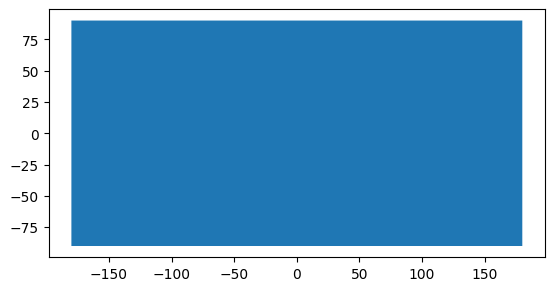

In [20]:
elvasion_data = gpd.read_file(r"D:\S3\data_mining\gmted2010\gmted2010.shp")
elvasion_data.plot()

In [21]:
elvation_data = rasterio.open(r"D:\S3\data_mining\projet\elvasion\be15_grd")
print(elvasion_data.crs)
print(elvation_data.bounds)
print(elvation_data.shape)



EPSG:4326
BoundingBox(left=-180.00013888888893, bottom=-56.00013888888891, right=179.99986111111085, top=83.999861111111)
(33600, 86400)


MemoryError: Unable to allocate 2.70 GiB for an array with shape (33600, 86400) and data type bool

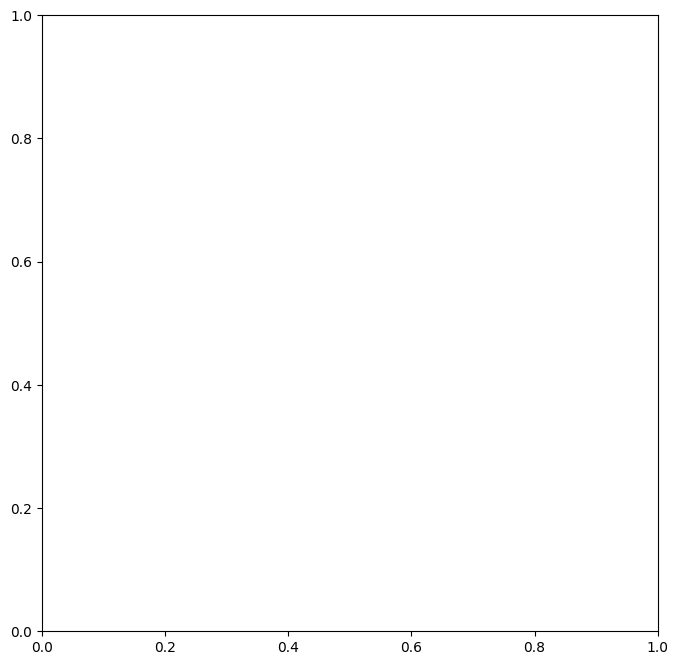

In [ ]:
data = elvation_data.read(1)


<Axes: >

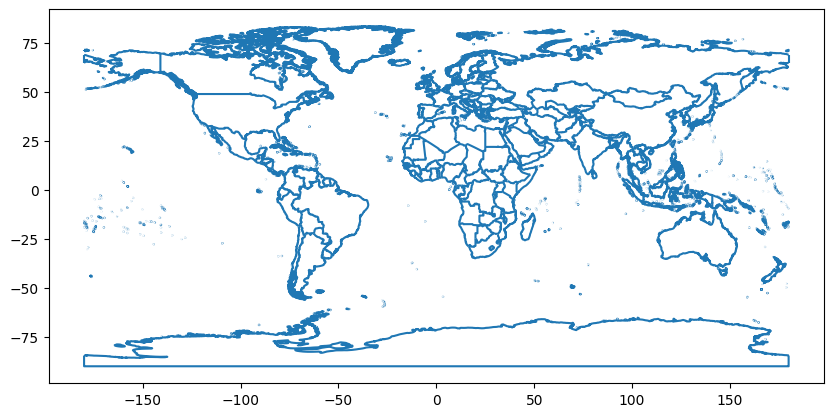

In [22]:
soil = gpd.read_file(r"D:\S3\data_mining\soil\data\country.shp")
soil.plot(figsize=(10,10))

In [29]:
%pip install pyodbc

Note: you may need to restart the kernel to use updated packages.


In [23]:
mdb = r"D:\S3\data_mining\soil\data\HWSD2.mdb"
drv = "Microsoft Access Driver (*.mdb, *.accdb)"  # ← JUST the driver name, no "DRIVER="
pwd = 'remzi'

conn_str = f"DRIVER={{{drv}}};DBQ={mdb};PWD={pwd}"



In [24]:
import pyodbc
con = pyodbc.connect(conn_str)

df = pd.read_sql('select * from HWSD2_LAYERS', con)

con.close()

C:\Users\serra\AppData\Local\Temp\ipykernel_9228\815177457.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('select * from HWSD2_LAYERS', con)


In [25]:

print(tabulate(df.head(10), headers='keys', tablefmt='simple'))

      ID    HWSD2_SMU_ID  NSC_MU_SOURCE1    NSC_MU_SOURCE2    WISE30s_SMU_ID      HWSD1_SMU_ID    COVERAGE    SEQUENCE    SHARE  NSC    WRB_PHASES    WRB4    WRB2    FAO90      ROOT_DEPTH    PHASE1    PHASE2    ROOTS    IL    SWR  DRAINAGE      AWC    ADD_PROP  LAYER      TOPDEP    BOTDEP    COARSE    SAND    SILT    CLAY    TEXTURE_USDA  TEXTURE_SOTER      BULK    REF_BULK    ORG_CARBON    PH_WATER    TOTAL_N    CN_RATIO    CEC_SOIL    CEC_CLAY    CEC_EFF    TEB    BSAT    ALUM_SAT    ESP    TCARBON_EQ    GYPSUM    ELEC_COND
--  ----  --------------  ----------------  ----------------  ----------------  --------------  ----------  ----------  -------  -----  ------------  ------  ------  -------  ------------  --------  --------  -------  ----  -----  ----------  -----  ----------  -------  --------  --------  --------  ------  ------  ------  --------------  ---------------  ------  ----------  ------------  ----------  ---------  ----------  ----------  ----------  ---------  ----- 

In [26]:
df = df[df["LAYER"] == 'D1']
print(df.isnull().sum())

ID                    0
HWSD2_SMU_ID          0
NSC_MU_SOURCE1    42851
NSC_MU_SOURCE2    42854
WISE30s_SMU_ID        0
HWSD1_SMU_ID          0
COVERAGE              0
SEQUENCE              0
SHARE                 0
NSC               58405
WRB_PHASES           10
WRB4               1748
WRB2                  0
FAO90                 0
ROOT_DEPTH            0
PHASE1            38920
PHASE2            40700
ROOTS             48342
IL                48342
SWR               33689
DRAINAGE           1347
AWC                   0
ADD_PROP            748
LAYER                 0
TOPDEP                0
BOTDEP                0
COARSE                0
SAND                  0
SILT                  0
CLAY                  0
TEXTURE_USDA       1289
TEXTURE_SOTER         0
BULK                  0
REF_BULK           1289
ORG_CARBON          672
PH_WATER              0
TOTAL_N               0
CN_RATIO              0
CEC_SOIL              0
CEC_CLAY              0
CEC_EFF               0
TEB             

In [27]:
print(tabulate(df.head(10), headers='keys', tablefmt='simple'))
print(df.columns)

       ID    HWSD2_SMU_ID  NSC_MU_SOURCE1    NSC_MU_SOURCE2    WISE30s_SMU_ID      HWSD1_SMU_ID    COVERAGE    SEQUENCE    SHARE  NSC    WRB_PHASES    WRB4    WRB2    FAO90      ROOT_DEPTH    PHASE1    PHASE2    ROOTS    IL    SWR  DRAINAGE      AWC    ADD_PROP  LAYER      TOPDEP    BOTDEP    COARSE    SAND    SILT    CLAY    TEXTURE_USDA  TEXTURE_SOTER      BULK    REF_BULK    ORG_CARBON    PH_WATER    TOTAL_N    CN_RATIO    CEC_SOIL    CEC_CLAY    CEC_EFF    TEB    BSAT    ALUM_SAT    ESP    TCARBON_EQ    GYPSUM    ELEC_COND
---  ----  --------------  ----------------  ----------------  ----------------  --------------  ----------  ----------  -------  -----  ------------  ------  ------  -------  ------------  --------  --------  -------  ----  -----  ----------  -----  ----------  -------  --------  --------  --------  ------  ------  ------  --------------  ---------------  ------  ----------  ------------  ----------  ---------  ----------  ----------  ----------  ---------  ----

In [53]:
print(f"before : {df.isnull().sum()}")

df = df.drop(columns=['ID', 'HWSD2_SMU_ID', 'NSC_MU_SOURCE1', 'NSC_MU_SOURCE2',
       'WISE30s_SMU_ID', 'HWSD1_SMU_ID', 'COVERAGE', 'SEQUENCE', 'SHARE',
       'NSC', 'WRB_PHASES', 'WRB4', 'WRB2', 'FAO90', 'ROOT_DEPTH', 'PHASE1',
       'PHASE2', 'ROOTS', 'IL', 'SWR', 'DRAINAGE', 'AWC', 'ADD_PROP', 'LAYER',
       'TOPDEP', 'BOTDEP'],  axis=1)



before : ID                    0
HWSD2_SMU_ID          0
NSC_MU_SOURCE1    42851
NSC_MU_SOURCE2    42854
WISE30s_SMU_ID        0
HWSD1_SMU_ID          0
COVERAGE              0
SEQUENCE              0
SHARE                 0
NSC               58405
WRB_PHASES           10
WRB4               1748
WRB2                  0
FAO90                 0
ROOT_DEPTH            0
PHASE1            38920
PHASE2            40700
ROOTS             48342
IL                48342
SWR               33689
DRAINAGE           1347
AWC                   0
ADD_PROP            748
LAYER                 0
TOPDEP                0
BOTDEP                0
COARSE                0
SAND                  0
SILT                  0
CLAY                  0
TEXTURE_USDA       1289
TEXTURE_SOTER         0
BULK                  0
REF_BULK           1289
ORG_CARBON          672
PH_WATER              0
TOTAL_N               0
CN_RATIO              0
CEC_SOIL              0
CEC_CLAY              0
CEC_EFF               0
TEB    

In [54]:
print(f"after {df.isnull().sum()}")

after COARSE              0
SAND                0
SILT                0
CLAY                0
TEXTURE_USDA     1289
TEXTURE_SOTER       0
BULK                0
REF_BULK         1289
ORG_CARBON        672
PH_WATER            0
TOTAL_N             0
CN_RATIO            0
CEC_SOIL            0
CEC_CLAY            0
CEC_EFF             0
TEB                 0
BSAT                0
ALUM_SAT            0
ESP                 0
TCARBON_EQ          0
GYPSUM              0
ELEC_COND           0
dtype: int64


In [55]:
print(tabulate(df.head(10), headers='keys', tablefmt='simple'))
print(df.columns)

       COARSE    SAND    SILT    CLAY    TEXTURE_USDA  TEXTURE_SOTER      BULK    REF_BULK    ORG_CARBON    PH_WATER    TOTAL_N    CN_RATIO    CEC_SOIL    CEC_CLAY    CEC_EFF    TEB    BSAT    ALUM_SAT    ESP    TCARBON_EQ    GYPSUM    ELEC_COND
---  --------  ------  ------  ------  --------------  ---------------  ------  ----------  ------------  ----------  ---------  ----------  ----------  ----------  ---------  -----  ------  ----------  -----  ------------  --------  -----------
666         5      67      18      15              11  C                  1.35        1.63         1.062         6.3       0.77          13           8          46          6      5      59           0      2             0       0.1            1
667         5      67      18      15              11  C                  1.35        1.63         1.062         6.3       0.77          13           8          46          6      5      59           0      2             0       0.1            1
668         5   

In [28]:
print(algeria_fire.isnull().sum())
print(tunis_fire.isnull().sum())

print(len(df))


latitude      0
longitude     0
bright_ti4    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_ti5    0
frp           0
daynight      0
type          0
dtype: int64
latitude      0
longitude     0
bright_ti4    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_ti5    0
frp           0
daynight      0
type          0
dtype: int64
58405


In [59]:
print(df.isnull().sum())


COARSE              0
SAND                0
SILT                0
CLAY                0
TEXTURE_USDA     1289
TEXTURE_SOTER       0
BULK                0
REF_BULK         1289
ORG_CARBON        672
PH_WATER            0
TOTAL_N             0
CN_RATIO            0
CEC_SOIL            0
CEC_CLAY            0
CEC_EFF             0
TEB                 0
BSAT                0
ALUM_SAT            0
ESP                 0
TCARBON_EQ          0
GYPSUM              0
ELEC_COND           0
dtype: int64


In [63]:
import rasterio
import matplotlib.pyplot as plt

# Path to your file
path = r"D:\S3\data_mining\soil\data\HWSD2_RASTER\HWSD2.bil"

with rasterio.open(path) as src:
    band1 = src.read(1)
    crs = src.crs
    transform = src.transform

plt.imshow(band1, cmap="terrain")
plt.title("Raster Preview")
plt.colorbar()
plt.show()



MemoryError: Unable to allocate 3.48 GiB for an array with shape (21600, 43200) and data type float32

<Figure size 640x480 with 2 Axes>

In [65]:
from rasterio.features import shapes
import geopandas as gpd
import numpy as np
from shapely.geometry import shape

# Mask invalid values (optional)
mask = band1 != src.nodata if src.nodata is not None else band1 != 0

# Extract polygons and values
results = (
    {'properties': {'value': v}, 'geometry': s}
    for s, v in shapes(band1, mask=mask, transform=transform)
)

# Convert to GeoDataFrame
geoms = list(results)
gdf = gpd.GeoDataFrame.from_features(geoms)
gdf.set_crs(crs, inplace=True)

print(gdf.head())

                                            geometry   value
0  POLYGON ((-29 83.58333, -29 83.56667, -28.9916...  6998.0
1  POLYGON ((-34.71667 83.625, -34.71667 83.61667...  6998.0
2  POLYGON ((-28.98333 83.53333, -28.98333 83.516...  6998.0
3  POLYGON ((-29.01667 83.53333, -29.01667 83.525...  3479.0
4  POLYGON ((-39.8 83.45, -39.8 83.44167, -39.808...  3479.0


In [66]:
print(gdf.columns)

Index(['geometry', 'value'], dtype='object')


In [69]:
gdf.to_file(r"D:\S3\data_mining\projet\soil_bil_alg_tun\bil_vectorized.gpkg", driver="GPKG")
